In [1]:
from tensorflow.keras.preprocessing import image
import numpy as np
from tensorflow.keras.models import *
import matplotlib.pyplot as plt

In [41]:
def predict(path):

    img = image.load_img(path, target_size=(432, 288))
    
    # Preprocessing the image
    pp_img = image.img_to_array(img)
    pp_img = pp_img/255
    pp_img = np.expand_dims(pp_img, axis=0)
    
    #Load Model
    saved_model = load_model("Mel_VGG16.h5")

    #predict
    img_pred= saved_model.predict(pp_img)
    
    perc_normal = img_pred[0][1]
    perc_normal = int(perc_normal * 100)
    
    perc_abnormal = img_pred[0][0]
    perc_abnormal = int(perc_abnormal * 100)
    
    
    if img_pred[0][0] >= 0.5: 
        pred = ('Abnormal : {} % percent'.format(perc_abnormal))
    
    else: 
        pred = ('Normal : {} % percent'.format(perc_normal))
        
    plt.title("Anomaly Detection\n"+ pred) 

    plt.imshow(np.squeeze(pp_img))
    
    return  plt.show()

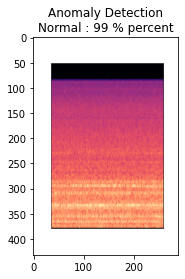

In [42]:
path = '/Users/yusufakcakaya/GitHub/Machine-Condition-Monitoring/prediction_images/normal_3000.png'
predict(path)

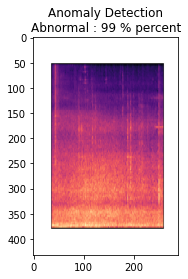

In [45]:
path = '/Users/yusufakcakaya/GitHub/Machine-Condition-Monitoring/Deep_Learning/new_test/audio1.png'
predict(path)

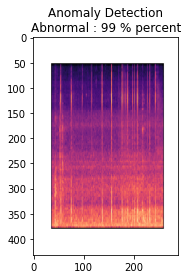

In [46]:
path = '/Users/yusufakcakaya/GitHub/Machine-Condition-Monitoring/Deep_Learning/new_test/audio2.png'
predict(path)